<a href="https://colab.research.google.com/github/JP109/Supervised-Learning-Algorithms-practise/blob/main/Classification%20Algorithms/Logistic_Regression_on_Titanic_Dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [6]:
#Importing libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler

In [7]:
#Importing the test and the train data
from google.colab import files
titanic_train = files.upload()
titanic_test = files.upload()

Saving train.csv to train (1).csv


Saving test.csv to test (1).csv


In [9]:
train_data = pd.read_csv('train.csv')
test_data = pd.read_csv('test.csv')
test_id = test_data.PassengerId

In [10]:
#Seeing the data
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [11]:
#Taking a look at the null values
print(train_data.isnull().any())
print('\n')
print(test_data.isnull().any())

PassengerId    False
Survived       False
Pclass         False
Name           False
Sex            False
Age             True
SibSp          False
Parch          False
Ticket         False
Fare           False
Cabin           True
Embarked        True
dtype: bool


PassengerId    False
Pclass         False
Name           False
Sex            False
Age             True
SibSp          False
Parch          False
Ticket         False
Fare            True
Cabin           True
Embarked       False
dtype: bool


In [12]:
#Counting the null values
print(train_data.isnull().sum())
print('\n')
print(test_data.isnull().sum())

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64


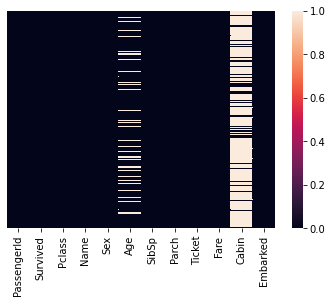

In [13]:
#Let us visualize the null values of our train data in a heatmap
sns.heatmap(train_data.isnull(), yticklabels=False)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


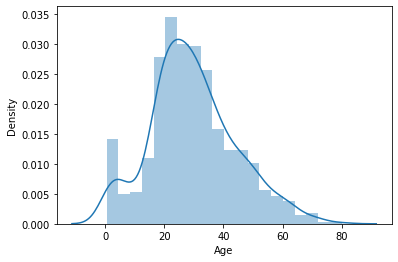

In [14]:
#We will have a look at the distribution of the Age
sns.distplot(train_data["Age"])

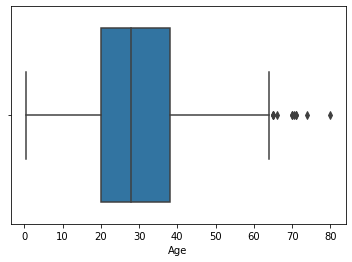

In [15]:
#We can see that it is right-skewed, so if we replace it by mean, then it won't be that accurate so we will replace the age by median, 
#but first let us see if any outliers are there in age
sns.boxplot(x="Age", data=train_data)

In [16]:
#We will apply Z-score to remove the outliers in Age
outliers=[]
def find_outliers(data):
    threshold = 3
    mean = np.mean(data)
    std = np.std(data)
    for i in data:
        Z_score = (i-mean)/std
        if np.abs(Z_score)>threshold:
            outliers.append(i)
    
    return outliers
find_outliers(train_data["Age"])

[80.0, 74.0]

In [17]:
#Removing the outliers
for i in range(len(train_data["Age"])):
    if(train_data["Age"][i] in outliers):
        train_data = train_data.drop(i)

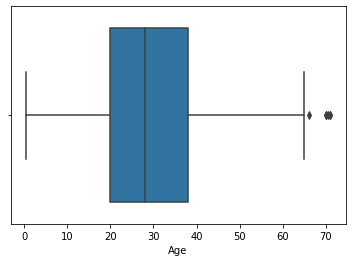

In [18]:
#check outliers in age after removing them, we can see there are still some outliers in the range 65-70 so we will keep them still
sns.boxplot(x="Age", data=train_data)

In [19]:
#We can still see there are some outliers still present, but we can keep this
#Replacing age with median after removing outliers
train_data["Age"].fillna(train_data["Age"].median(skipna=True), inplace=True)
test_data["Age"].fillna(test_data["Age"].median(skipna=True), inplace=True)

2

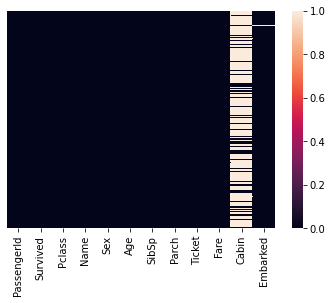

In [20]:
#Checking the heatmap for null values again
sns.heatmap(train_data.isnull(), yticklabels=False)
train_data["Embarked"].isnull().sum()

In [21]:
#As we can see in embarked only 2 values are null, so we will replace it with the most frequent occuring value
train_data['Embarked'].describe()

count     887
unique      3
top         S
freq      642
Name: Embarked, dtype: object

In [22]:
#As S is the top, so we will replace null by S
common_value = 'S'
data = [train_data]
for dataset in data:
    dataset['Embarked'] = dataset['Embarked'].fillna(common_value)

In [23]:
#Counting the number of null values in cabin
train_data['Cabin'].isnull().sum()

686

In [24]:
#As 686 values are null, so we will drop this in both train and test data
drop_column = ['Cabin']
train_data.drop(drop_column, axis=1, inplace = True)
test_data.drop(drop_column, axis=1, inplace = True)

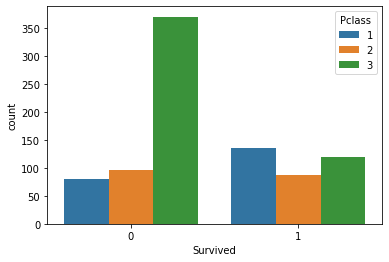

In [25]:
#Exploratory Data Analysis
#Now let's do some analysis
#From this, we can see that passengers in class 1 have better chance of survavility, so this feature is important
sns.countplot(x='Survived',hue='Pclass',data=train_data)

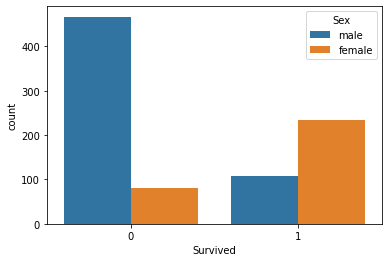

In [26]:
#From this we can see that more female survived than male
sns.countplot(x='Survived',hue='Sex',data=train_data)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


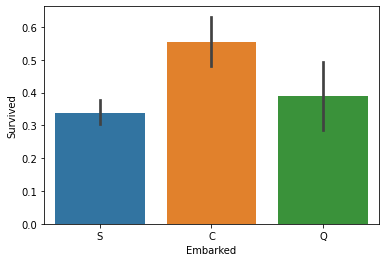

In [27]:
#From this we can say that passenger boarded in Cherbourg have higher chance of survavility than the others and passengers
#boarded in Queenstown has higher chance of survavility than the ones who boarded in Southhampton
sns.barplot('Embarked', 'Survived', data=train_data)

In [28]:
#Let's apply one hot encoding to Sex and Embarked
train_data = pd.get_dummies(train_data,columns = ["Sex","Embarked"])
test_data = pd.get_dummies(test_data,columns = ["Sex","Embarked"])

In [29]:
#Let us see the correlation between the features
train_data.corr()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
PassengerId,1.000000,-0.004646,-0.035466,0.025402,-0.056410,-0.000429,0.013592,-0.041127,0.041127,0.000041,-0.032870,0.020656
Survived,-0.004646,1.000000,-0.336534,-0.068540,-0.035120,0.082007,0.257291,0.544763,-0.544763,0.168755,0.003821,-0.150266
Pclass,-0.035466,-0.336534,1.000000,-0.342048,0.082854,0.018085,-0.550166,-0.132829,0.132829,-0.244187,0.221167,0.074728
Age,0.025402,-0.068540,-0.342048,1.000000,-0.233000,-0.171235,0.100325,-0.076296,0.076296,0.034757,-0.029332,-0.011989
SibSp,-0.056410,-0.035120,0.082854,-0.233000,1.000000,0.414542,0.159427,0.113942,-0.113942,-0.060074,-0.026692,0.069438
Parch,-0.000429,0.082007,0.018085,-0.171235,0.414542,1.000000,0.216023,0.244915,-0.244915,-0.011588,-0.081585,0.061512
Fare,0.013592,0.257291,-0.550166,0.100325,0.159427,0.216023,1.000000,0.182024,-0.182024,0.269151,-0.117430,-0.161904
Sex_female,-0.041127,0.544763,-0.132829,-0.076296,0.113942,0.244915,0.182024,1.000000,-1.000000,0.082125,0.073658,-0.118325
Sex_male,0.041127,-0.544763,0.132829,0.076296,-0.113942,-0.244915,-0.182024,-1.000000,1.000000,-0.082125,-0.073658,0.118325
Embarked_C,0.000041,0.168755,-0.244187,0.034757,-0.060074,-0.011588,0.269151,0.082125,-0.082125,1.000000,-0.148646,-0.782613


In [30]:
#From above we can see that passenger id is close to 0 w.r.t to Survived it means it have 
#no relation with the Survival of a passenger, so we will drop it along with Name, Parch and Ticket id
drop_column=['PassengerId', 'Parch', 'Ticket','Name']
train_data.drop(drop_column, axis=1, inplace = True)
test_data.drop(drop_column, axis=1, inplace = True)

In [31]:
#We saw earlier test data have one null value in fare, so we can simply replace it with median
test_data["Fare"].fillna(test_data["Fare"].median(skipna=True), inplace=True)

In [32]:
#Now let us split the train-test
X = train_data.drop('Survived',axis=1)
y = train_data['Survived']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [33]:
# Scale the feature data so it has mean = 0 and standard deviation = 1, because ConvergenceWarning was showing, due to not the variables not being scaled 
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
#Logistic Regression
logmodel = LogisticRegression()
logmodel.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [34]:
predictions = logmodel.predict(X_test)
accuracy=confusion_matrix(y_test,predictions)
accuracy

array([[137,  23],
       [ 28,  79]])

In [35]:
accuracy=accuracy_score(y_test,predictions)
accuracy

0.8089887640449438

In [36]:
#using our test.csv
scaler = StandardScaler()
train = scaler.fit_transform(train_data.drop('Survived',axis=1))
test = scaler.transform(test_data)
model = LogisticRegression()
model.fit(train, y)
submission = pd.DataFrame({"PassengerId": test_id, "Survived": model.predict(test)})
submission.to_csv('submission.csv', index=False)